## **Loading Dataset**

In [ ]:
import numpy as np
import pandas as pd
import datetime
data=pd.read_csv('DATA.csv')


## **Considering only relevant features**

In [ ]:
data = data[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
data.rename(columns={'merchant_state':'state'},inplace=True)
data

,status,card_present_flag,balance,date,gender,age,merchant_suburb,state,amount,customer_id,movement
0,authorized,1.0,35.39,01-08-2018,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,01-08-2018,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,01-08-2018,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,01-08-2018,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,01-08-2018,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit
...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,14054.14,31-10-2018,F,30,Ringwood,VIC,9.79,CUS-55310383,debit
12039,authorized,1.0,9137.79,31-10-2018,M,20,Casula,NSW,63.87,CUS-2688605418,debit
12040,authorized,1.0,45394.57,31-10-2018,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit
12041,authorized,1.0,11350.67,31-10-2018,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit


# **Exploratory Data Analysis**

## **Mean Transaction Amount**

In [ ]:
data.amount.mean()

187.93358797641767

## **Total number of transactions made on each day¶**

In [ ]:
data["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-05-10    168
2018-10-17    162
2018-09-14    161
             ... 
2018-06-08     99
2018-08-20     97
2018-10-23     96
2018-08-10     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

## **Total number of transactions made by each customer¶**

In [ ]:
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [ ]:
data.isnull().sum()/data.isnull().count()

status               0.000000
card_present_flag    0.359213
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.359213
state                0.359213
amount               0.000000
customer_id          0.000000
movement             0.000000
dtype: float64

In [ ]:
data.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


## **Transaction volume each day**

In [ ]:
data_date_count = data.groupby("date").count()
data_date_count.tail()

,status,card_present_flag,balance,gender,age,merchant_suburb,state,amount,customer_id,movement
date,,,,,,,,,,
30-08-2018,143,95,143,143,143,95,95,143,143,143
30-09-2018,107,84,107,107,107,84,84,107,107,107
30-10-2018,89,50,89,89,89,50,50,89,89,89
31-08-2018,153,104,153,153,153,104,104,153,153,153
31-10-2018,141,93,141,141,141,93,93,141,141,141


In [ ]:
trans_vol = data_date_count["customer_id"].mean()
n_points = len(data_date_count.index)
n_points

91

In [ ]:
trans_vol

132.34065934065933

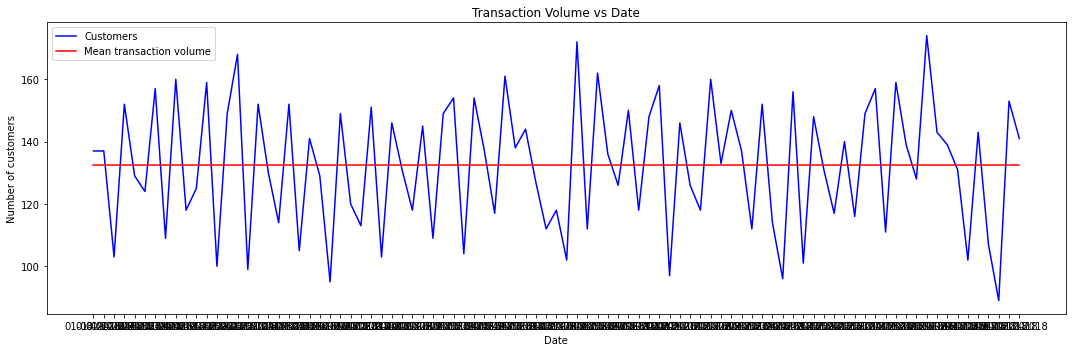

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(data_date_count.index, data_date_count["customer_id"], c="b", label = "Customers")
plt.plot(data_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("Transaction Volume vs Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

## **Mean transaction amount each day**

In [ ]:
data_date_mean=data.groupby("date").mean()
data_date_mean

,card_present_flag,balance,age,amount
date,,,,
01-08-2018,0.750000,9933.975328,30.233577,218.014161
01-09-2018,0.818182,11320.318905,28.656934,50.079489
01-10-2018,0.807018,20588.353689,29.864078,396.340097
02-08-2018,0.858586,13963.617895,31.493421,143.331053
02-09-2018,0.765957,10984.773333,28.930233,40.295891
...,...,...,...,...
30-08-2018,0.768421,14761.528392,31.951049,145.556154
30-09-2018,0.797619,12752.153832,29.803738,56.434206
30-10-2018,0.860000,19006.962022,31.348315,247.891461


In [ ]:
mean_amt=data_date_mean['amount'].mean()
row=len(data_date_mean.index)
mean_amt
data_date_mean.index
row

91

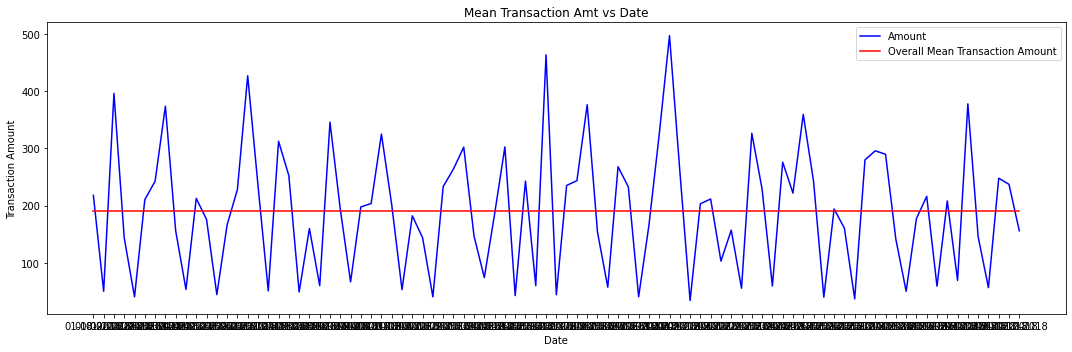

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_date_mean.index,data_date_mean['amount'],'b')
plt.plot(data_date_mean.index,np.linspace(mean_amt,mean_amt,row),"red")
plt.xlabel('Date')
plt.ylabel("Transaction Amount")
plt.title('Mean Transaction Amt vs Date')
plt.legend(['Amount','Overall Mean Transaction Amount'])
plt.tight_layout()

## **Number of Transactions every month**

In [ ]:
data['date']=pd.to_datetime(data['date'],errors='coerce')
data['month']=data['date'].dt.month

In [ ]:
mean_mnth=data.groupby(['month']).count()
# mean_mnth.groupby('customer_id').count()
mean_mnth

,status,card_present_flag,balance,date,gender,age,merchant_suburb,state,amount,customer_id,movement
month,,,,,,,,,,,
1,377,251,377,377,377,377,251,251,377,377,377
2,405,264,405,405,405,405,264,264,405,405,405
3,426,254,426,426,426,426,254,254,426,426,426
4,402,270,402,402,402,402,270,270,402,402,402
5,417,269,417,417,417,417,269,269,417,417,417
6,381,247,381,381,381,381,247,247,381,381,381
7,371,241,371,371,371,371,241,241,371,371,371
8,2750,1754,2750,2750,2750,2750,1754,1754,2750,2750,2750
9,2823,1816,2823,2823,2823,2823,1816,1816,2823,2823,2823


Text(0.5, 1.0, 'No. of Transactions every month')

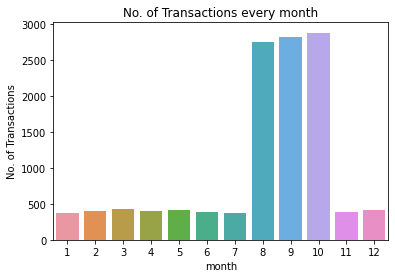

In [ ]:
import seaborn as sns
plt.figure()
# plt.plot(mean_mnth.index,mean_mnth['transaction_id'],'black')
sns.barplot(x=mean_mnth.index,y=mean_mnth['customer_id'])
plt.ylabel('No. of Transactions')
plt.title('No. of Transactions every month')

## **Total Transaction Volume by Merchant State**

In [ ]:
state_data=data.groupby("state").sum()
state_data

,card_present_flag,balance,age,amount,month
state,,,,,
ACT,64.0,911719.22,2227,4876.68,596
NSW,1712.0,20493615.96,64726,102021.77,17228
NT,167.0,1136194.09,5555,9168.89,1659
QLD,1266.0,11035157.51,46546,53483.45,12520
SA,331.0,4627386.99,12820,16776.57,3298
TAS,60.0,777312.96,2326,1962.93,508
VIC,1719.0,41881071.72,68284,87584.00,17122
WA,875.0,10746485.22,29428,33992.06,8861


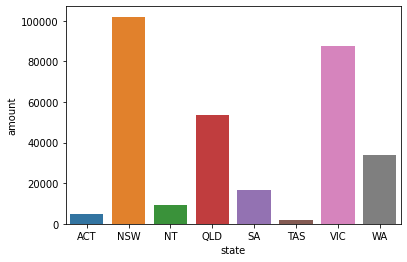

In [ ]:
plt.figure()
sns.barplot(x=state_data.index,y=state_data['amount'])

In [ ]:
merchant_state = data.groupby(["date","state"])["amount"].sum().reset_index()
merchant_state.head()

,date,state,amount
0,2018-01-08,NSW,828.36
1,2018-01-08,NT,73.25
2,2018-01-08,QLD,921.76
3,2018-01-08,SA,62.37
4,2018-01-08,TAS,17.13


Text(0.5, 1.0, 'Total Transaction Amount vs Months for Merchant States')

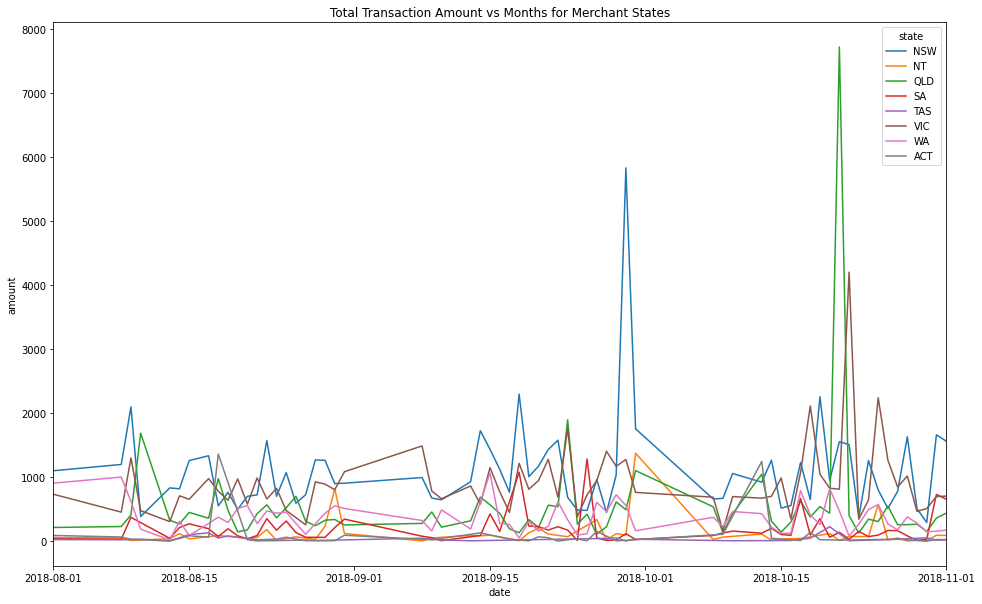

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x='date',y='amount',hue='state',data=merchant_state) 
plt.xlim(['2018-08','2018-11'])
plt.title('Total Transaction Amount of Merchant States per Month')

## **Mean Transaction Volume by Merchant State**

In [ ]:
merchant_state_mean = data.groupby(["date","state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,state,amount
0,2018-01-08,NSW,29.584286
1,2018-01-08,NT,24.416667
2,2018-01-08,QLD,54.221176
3,2018-01-08,SA,15.592500
4,2018-01-08,TAS,17.130000


(736907.0, 736999.0)

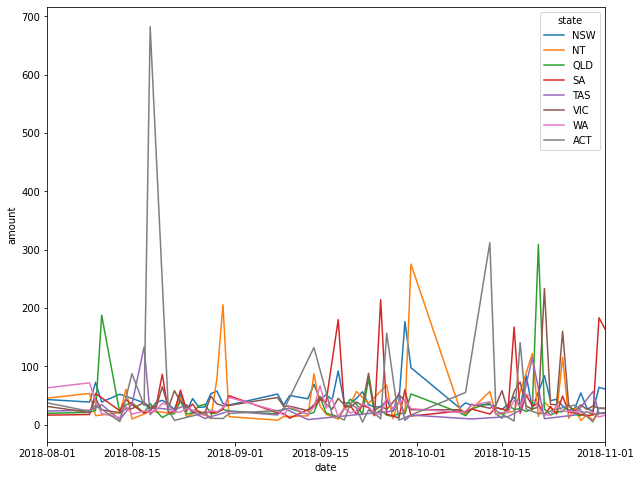

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(y="amount",x="date",hue="state", data=merchant_state_mean)
plt.xlim(['2018-08','2018-11'])